In [3]:
#Import require libraries for sentiment analysis :
import pandas as pd

import nltk
from nltk import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
import matplotlib.pyplot as plt

nltk.download("popular")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dsai0\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\dsai0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\dsai0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\dsai0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\dsai0\AppData\Roaming\nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\dsa

True

In [5]:
#Get the data from raw repository

url = 'https://raw.githubusercontent.com/dsai050898/TWITTER-SA-DATA/main/RAW%20DATA/Corona_NLP_test.csv' 

In [10]:
# # Importing RawData set into data frame
raw_df = pd.read_csv(url,index_col=0)

In [11]:
# Checking top five rows of the data
raw_df.head(5)

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [12]:
# Checking last five rows of the data
raw_df.tail(5)

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
3794,48746,Israel ??,16-03-2020,Meanwhile In A Supermarket in Israel -- People...,Positive
3795,48747,"Farmington, NM",16-03-2020,Did you panic buy a lot of non-perishable item...,Negative
3796,48748,"Haverford, PA",16-03-2020,Asst Prof of Economics @cconces was on @NBCPhi...,Neutral
3797,48749,NaN,16-03-2020,Gov need to do somethings instead of biar je r...,Extremely Negative
3798,48750,"Arlington, Virginia",16-03-2020,I and @ForestandPaper members are committed to...,Extremely Positive


In [13]:
# finding number of columns and number of rows in data 
raw_df.shape

(3798, 5)

# DATA CLEANING

In [14]:
# Checking data for null values
raw_df.isnull()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
UserName,,,,,
1,False,False,False,False,False
2,False,False,False,False,False
3,False,True,False,False,False
4,False,False,False,False,False
5,False,False,False,False,False
...,...,...,...,...,...
3794,False,False,False,False,False
3795,False,False,False,False,False
3796,False,False,False,False,False


In [15]:
# Calculating count of total null values in the data
raw_df.isnull().sum()

ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [16]:
# Then dropping null values in data 
raw_df.dropna(inplace = True)

In [18]:
# Checking whether null values were dropped
raw_df.isnull().sum()

ScreenName       0
Location         0
TweetAt          0
OriginalTweet    0
Sentiment        0
dtype: int64

In [19]:
print("Number of Rows: {}\nNumber of Columns: {}".format(raw_df.shape[0], raw_df.shape[1]))

Number of Rows: 2964
Number of Columns: 5


In [26]:
raw_df.index= pd.RangeIndex(start=1, stop=1+len(raw_df), step=1)

In [32]:
# Saving cleaned file into local
raw_df.to_csv('C:/Users/dsai0/OneDrive/Desktop/TWITTER PDS/CLEAN DATA/cleandata.csv')

# DATA ANALYSIS

In [33]:
df_raw.head()

,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


In [35]:
df_actualTweet =raw_df['OriginalTweet']

In [37]:
#remove URLS in the data
#converting to lowercase letters
#stopwords removal

#remove special characters

from nltk.corpus import stopwords
import re



stopwords = set(stopwords.words("english"))
corpus = []
for i in range(1, len(df_actualTweet)):
  review = re.sub(r"https?:[^\s]+", " " ,df_actualTweet[i])
  review = re.sub('[^a-zA-Z]',' ', review)
  review = review.lower()
  review = review.split()
  review = [word for word in review if not word in stopwords]
  review = ' '.join(review)
  corpus.append(review)

In [38]:
print(corpus)

['trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock', 'find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices', 'panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc', 'toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper', 'remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc', 'drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus', 'anyone supermarket last days went normal sho

In [39]:
# converting the list to sentance for tokenization
OriginalTweet_para = ' '.join(str(e) for e in corpus)

In [40]:
print(OriginalTweet_para)

trending new yorkers encounter empty supermarket shelves pictured wegmans brooklyn sold online grocers foodkick maxdelivery coronavirus fearing shoppers stock find hand sanitizer fred meyer turned amazon pack purell check coronavirus concerns driving prices panic buying hits newyork city anxious shoppers stock food amp medical supplies healthcare worker becomes bigapple st confirmed coronavirus patient bloomberg staged event qanon qanon qanon election cdc toiletpaper dunnypaper coronavirus coronavirusaustralia coronavirusupdate covid news corvid newsmelb dunnypapergate costco one week everyone buying baby milk powder next everyone buying toilet paper remember last time paid gallon regular gas los angeles prices pump going look coronavirus impacting prices pm abc drtedros stop covid without protecting healthworkers prices surgical masks increased six fold n respirators trebled amp gowns cost twice much drtedros coronavirus anyone supermarket last days went normal shop last night amp sig

In [58]:
# Saving corpus
a = open("C:/Users/dsai0/OneDrive/Desktop/TWITTER PDS/RESULT/output_corpus.txt", "w") 
print(corpus, file=a)
a.close()

In [42]:
# word tokenization
word_tokenize = nltk.word_tokenize(OriginalTweet_para)
print(word_tokenize)

['trending', 'new', 'yorkers', 'encounter', 'empty', 'supermarket', 'shelves', 'pictured', 'wegmans', 'brooklyn', 'sold', 'online', 'grocers', 'foodkick', 'maxdelivery', 'coronavirus', 'fearing', 'shoppers', 'stock', 'find', 'hand', 'sanitizer', 'fred', 'meyer', 'turned', 'amazon', 'pack', 'purell', 'check', 'coronavirus', 'concerns', 'driving', 'prices', 'panic', 'buying', 'hits', 'newyork', 'city', 'anxious', 'shoppers', 'stock', 'food', 'amp', 'medical', 'supplies', 'healthcare', 'worker', 'becomes', 'bigapple', 'st', 'confirmed', 'coronavirus', 'patient', 'bloomberg', 'staged', 'event', 'qanon', 'qanon', 'qanon', 'election', 'cdc', 'toiletpaper', 'dunnypaper', 'coronavirus', 'coronavirusaustralia', 'coronavirusupdate', 'covid', 'news', 'corvid', 'newsmelb', 'dunnypapergate', 'costco', 'one', 'week', 'everyone', 'buying', 'baby', 'milk', 'powder', 'next', 'everyone', 'buying', 'toilet', 'paper', 'remember', 'last', 'time', 'paid', 'gallon', 'regular', 'gas', 'los', 'angeles', 'price

In [43]:
# Coutning word frequencies
fdist = FreqDist(word_tokenize)

In [44]:
#Print 14 most common words :
fdist.most_common(14)

[('covid', 2275),
 ('coronavirus', 1196),
 ('food', 1050),
 ('store', 792),
 ('grocery', 624),
 ('people', 607),
 ('stock', 604),
 ('amp', 494),
 ('supermarket', 413),
 ('shopping', 412),
 ('online', 402),
 ('panic', 399),
 ('prices', 335),
 ('need', 291)]

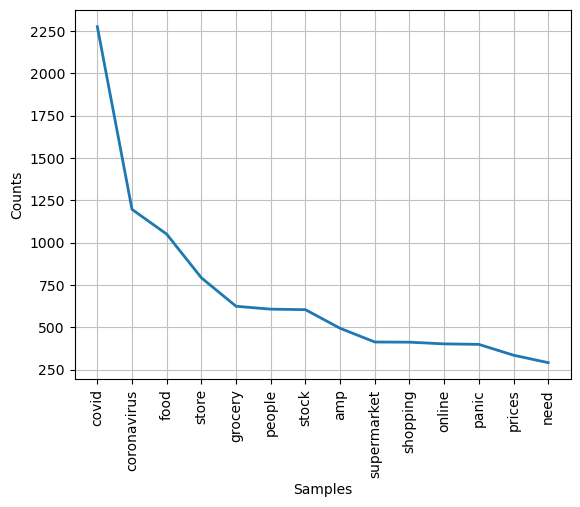

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [57]:
#Plot the graph for fdist :

plt.savefig("C:/Users/dsai0/OneDrive/Desktop/TWITTER PDS/RESULT/freqimg.png")
fdist.plot(14)

In [47]:
!pip install wordcloud
#Library to form wordcloud
from wordcloud import WordCloud, ImageColorGenerator
import requests
import numpy as np
from PIL import Image

#Library to plot the wordcloud
import matplotlib.pyplot as plt


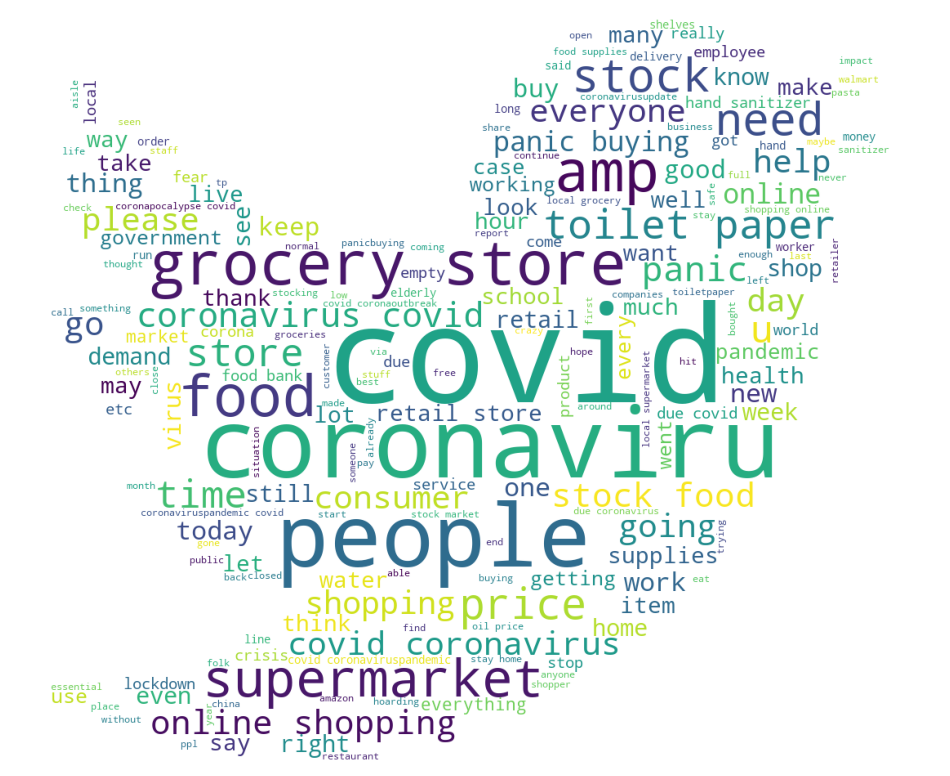

In [53]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)



#Generating the wordcloud :
wordcloud = WordCloud(background_color='white', height=1500, width=4000,mask=Mask).generate(OriginalTweet_para)

#Plot the wordcloud :
plt.figure(figsize = (12, 12)) 
plt.imshow(wordcloud) 

#To remove the axis value :
plt.axis("off") 

plt.savefig("C:/Users/dsai0/OneDrive/Desktop/TWITTER PDS/RESULT/wordcloud.png")
plt.show()
